# Load Data

In [4]:
import json
import torch
import random
import os
import pickle
from sklearn.preprocessing import LabelEncoder
from transformers import AutoModel, AutoTokenizer
from torch.utils.data import DataLoader, Dataset
from torch import nn
import numpy as np
from scipy.linalg import inv
from torch.optim import Adam

In [5]:
seed_value=42
random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)
torch.cuda.manual_seed_all(seed_value)

# Load CLINC150

In [6]:
# Load the dataset
with open("clinc150_uci/data_full.json", "r") as file:
    data = json.load(file)
# Extracting data
train_data = data['train']
val_data = data['val']
test_data = data['test']

oos_train_data = data['oos_train']
oos_val_data = data['oos_val']
oos_test_data = data['oos_test']

# Get sentences and labels
train_sentences = [item[0] for item in train_data]
train_labels = [item[1] for item in train_data]

val_sentences = [item[0] for item in val_data]
val_labels = [item[1] for item in val_data]

test_sentences = [item[0] for item in test_data]
test_labels = [item[1] for item in test_data]

oos_train_sentences = [item[0] for item in oos_train_data]
oos_val_sentences = [item[0] for item in oos_val_data]
oos_test_sentences = [item[0] for item in oos_test_data]
model_name = "ce_model_bert_CLINC150.pth"

# BANKING77-OOS

In [7]:
# # Define the IntentExample class and load_intent_examples function as provided
# class IntentExample:
#     def __init__(self, text, label, do_lower_case):
#         self.original_text = text
#         self.text = text
#         self.label = label
#         if do_lower_case:
#             self.text = self.text.lower()

# def load_intent_examples(file_path, do_lower_case=True):
#     examples = []
#     with open(f'{file_path}/seq.in', 'r', encoding="utf-8") as f_text, open(f'{file_path}/label', 'r', encoding="utf-8") as f_label:
#         for text, label in zip(f_text, f_label):
#             e = IntentExample(text.strip(), label.strip(), do_lower_case)
#             examples.append(e)
#     return examples

# # Define paths to the dataset directories
# base_dir = 'Few-Shot-Intent-Detection/Datasets/BANKING77-OOS'
# paths = {
#     'train': f'{base_dir}/train',
#     'valid': f'{base_dir}/valid',
#     'test': f'{base_dir}/test',
#     'oos_val': f'{base_dir}/ood-oos/valid',
#     'oos_test': f'{base_dir}/ood-oos/test'
# }
# datasets = {key: load_intent_examples(path) for key, path in paths.items()}

# # Extract sentences and labels from the loaded datasets
# train_sentences = [e.text for e in datasets['train']]
# train_labels = [e.label for e in datasets['train']]

# val_sentences = [e.text for e in datasets['valid']]
# val_labels = [e.label for e in datasets['valid']]

# test_sentences = [e.text for e in datasets['test']]
# test_labels = [e.label for e in datasets['test']]

# oos_val_sentences = [e.text for e in datasets['oos_val']]
# oos_test_sentences = [e.text for e in datasets['oos_test']]
# model_name = "ce_model_bert_BANKING77.pth"


# SNIPS

In [8]:
# # Define the IntentExample class and load_intent_examples function as provided
# class IntentExample:
#     def __init__(self, text, label, do_lower_case):
#         self.original_text = text
#         self.text = text
#         self.label = label
#         if do_lower_case:
#             self.text = self.text.lower()

# def load_intent_examples(file_path, do_lower_case=True):
#     examples = []
#     with open(f'{file_path}/seq.in', 'r', encoding="utf-8") as f_text, open(f'{file_path}/label', 'r', encoding="utf-8") as f_label:
#         for text, label in zip(f_text, f_label):
#             e = IntentExample(text.strip(), label.strip(), do_lower_case)
#             examples.append(e)
#     return examples

# # Define paths to the dataset directories
# base_dir = 'Few-Shot-Intent-Detection/Datasets/SNIPS'
# paths = {
#     'train': f'{base_dir}/train',
#     'valid': f'{base_dir}/valid',
#     'test': f'{base_dir}/test'
# }
# datasets = {key: load_intent_examples(path) for key, path in paths.items()}

# # Extract sentences and labels from the loaded datasets
# train_sentences = [e.text for e in datasets['train']]
# train_labels = [e.label for e in datasets['train']]

# val_sentences = [e.text for e in datasets['valid']]
# val_labels = [e.label for e in datasets['valid']]

# test_sentences = [e.text for e in datasets['test']]
# test_labels = [e.label for e in datasets['test']]
# unique_scenarios = set(train_labels)
# oos_scenario = random.choice(list(unique_scenarios))

# # Separate out of scope data
# oos_train_data = [(s, l) for s, l in zip(train_sentences, train_labels) if l == oos_scenario]
# oos_val_data = [(s, l) for s, l in zip(val_sentences, val_labels) if l == oos_scenario]
# oos_test_data = [(s, l) for s, l in zip(test_sentences, test_labels) if l == oos_scenario]

# # Remove out of scope data from original sets
# train_data = [(s, l) for s, l in zip(train_sentences, train_labels) if l != oos_scenario]
# val_data = [(s, l) for s, l in zip(val_sentences, val_labels) if l != oos_scenario]
# test_data = [(s, l) for s, l in zip(test_sentences, test_labels) if l != oos_scenario]
# # Extract sentences and labels
# train_sentences = [item[0] for item in train_data]
# train_labels = [item[1] for item in train_data]

# val_sentences = [item[0] for item in val_data]
# val_labels = [item[1] for item in val_data]

# test_sentences = [item[0] for item in test_data]
# test_labels = [item[1] for item in test_data]

# oos_train_sentences = [item[0] for item in oos_train_data]
# oos_val_sentences = [item[0] for item in oos_val_data]
# oos_test_sentences = [item[0] for item in oos_test_data]
# model_name = "ce_model_bert_SNIP.pth"
# oos_scenario

# ROSTD

In [9]:
# from datasets import load_dataset

# dataset = load_dataset("cmaldona/Generalization-MultiClass-CLINC150-ROSTD", "rostd+")

# train_sentences = []
# train_labels = []
# val_sentences = []
# val_labels = []
# test_sentences = []
# test_labels = []
# oos_test_sentences = []

# # Extract training data
# for example in dataset['train']:
#     train_sentences.append(example['data'].lower())
#     train_labels.append(example['labels'])

# # Extract validation data
# for example in dataset['validation']:
#     val_sentences.append(example['data'].lower())
#     val_labels.append(example['labels'])

# # Extract test data and separate ID from OOS
# for example in dataset['test']:
#     if example['generalisation'] == 'ID':
#         test_sentences.append(example['data'].lower())
#         test_labels.append(example['labels'])
#     elif example['generalisation'] == 'near-OOD' or example['generalisation'] == 'far-OOD':# OOS
#         try:
#             oos_test_sentences.append(example['data'].lower())
#         except:
#             continue
            

# model_name = "ce_model_bert_ROSTD.pth"

# StackOverflow

In [10]:
split_number = 1  # Adjust this to the split number you're interested in

# Define the base directory where the splits are stored
base_dir = 'stackoverflow_data'  # Update this with your actual directory path

# Construct the path to the specific split
split_dir = os.path.join(base_dir, f'split{split_number}')

# Function to load data from a .pkl file
def load_data_from_split(split_dir, file_name):
    with open(os.path.join(split_dir, file_name), 'rb') as file:
        return pickle.load(file)

# Load the datasets
train_sentences = load_data_from_split(split_dir, 'train_sentences.pkl')
train_labels = load_data_from_split(split_dir, 'train_labels.pkl')
val_sentences = load_data_from_split(split_dir, 'val_sentences.pkl')
val_labels = load_data_from_split(split_dir, 'val_labels.pkl')
test_sentences = load_data_from_split(split_dir, 'test_sentences.pkl')
test_labels = load_data_from_split(split_dir, 'test_labels.pkl')
oos_val_sentences = load_data_from_split(split_dir, 'oos_val_sentences.pkl')
oos_test_sentences = load_data_from_split(split_dir, 'oos_test_sentences.pkl')
model_name = "ce_model_bert_Stack.pth"

# Encode Labels

In [12]:
label_encoder = LabelEncoder()
# Fit the label encoder and transform labels to integers
encoded_train_labels = label_encoder.fit_transform(train_labels)
encoded_val_labels = label_encoder.fit_transform(val_labels)

# Tokenize our sentences and create Dataloaders

In [13]:
pretrained_model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name)
transformer_model = AutoModel.from_pretrained(pretrained_model_name)
tokenized_lengths = [len(tokenizer.encode(sentence, add_special_tokens=True)) for sentence in train_sentences]
max_length = max(tokenized_lengths)
print(f"Max length for tokenizer: {max_length}")

class TextDataset(Dataset):
    def __init__(self, sentences, labels, tokenizer, max_length=512):
        self.encodings = tokenizer(sentences, truncation=True, padding=True, max_length=max_length)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# 2. Create the dataset
train_dataset = TextDataset(train_sentences, encoded_train_labels, tokenizer, max_length)
val_dataset = TextDataset(val_sentences, encoded_val_labels, tokenizer, max_length)


Max length for tokenizer: 33


# Define functions to encode our sentences

In [14]:
transformer_model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transformer_model = transformer_model.to(device)
def encode_sentences(model, sentences, tokenizer=tokenizer, batch_size=256):
    model = model.to(device)
    sentence_embeddings = []

    # Process sentences in batches
    for i in range(0, len(sentences), batch_size):
        batch_sentences = sentences[i:i+batch_size]
        encoded_input = tokenizer(batch_sentences, return_tensors='pt', padding=True, truncation=True, max_length=512)
        
        # Move the batch to the same device as the model
        encoded_input = {k: v.to(device) for k, v in encoded_input.items()}
        
        with torch.no_grad():
            model_output = model(**encoded_input)

        pooled_output = model_output.last_hidden_state.mean(dim=1)
        sentence_embeddings.append(pooled_output)

    # Concatenate all batched embeddings and move to CPU in one go
    sentence_embeddings_np = torch.cat(sentence_embeddings, dim=0).cpu().numpy()
    
    return sentence_embeddings_np

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


# Define our model

In [15]:
transformer_model = AutoModel.from_pretrained(pretrained_model_name)
import torch.nn as nn

class TextClassifier(nn.Module):
    def __init__(self, transformer_model, num_labels):
        super(TextClassifier, self).__init__()
        self.transformer = transformer_model
        self.classifier = nn.Linear(self.transformer.config.hidden_size, num_labels)
    
    def forward(self, input_ids, attention_mask):
        # Get the output from the transformer model
        transformer_output = self.transformer(input_ids=input_ids, attention_mask=attention_mask)
        # Pool the outputs into a single sentence vector
        # You can use `transformer_output.last_hidden_state.mean(dim=1)` for mean pooling
        # or `transformer_output.last_hidden_state.max(dim=1).values` for max pooling
        sentence_embedding = transformer_output.last_hidden_state.max(dim=1).values
        # Forward pass through the classifier layer
        return self.classifier(sentence_embedding)


# Initiallize everything else we needed

In [16]:
unique_intents = list(set(train_labels)) 
transformer_model = AutoModel.from_pretrained(pretrained_model_name)
transformer_model.to(device)
model = TextClassifier(transformer_model, len(unique_intents))
model.to(device)
optimizer = Adam(model.parameters(), lr=5e-05)
training_losses = []
validation_losses = []
batch_size= 128
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
loss_function = nn.CrossEntropyLoss()

In [25]:
num_epochs = 20

# Training Loop!!!

In [26]:
best_val_loss = float('inf')
for epoch in range(num_epochs):
    # Training Phase
    model.train()  # Set the model to training mode
    total_train_loss = 0
    for batch in train_dataloader:
        input_ids, attention_mask, labels = batch['input_ids'].to(device), batch['attention_mask'].to(device), batch['labels'].to(device)
        optimizer.zero_grad()  # Zero the gradients
        predictions = model(input_ids, attention_mask)  # Forward pass
        loss = loss_function(predictions, labels) 
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        total_train_loss += loss.item()
    
    avg_train_loss = total_train_loss / len(train_dataloader)
    training_losses.append(avg_train_loss) 

    # Validation Phase
    model.eval()  # Set the model to evaluation mode
    total_val_loss = 0
    with torch.no_grad():  # Disable gradient calculations
        for batch in val_dataloader:
            input_ids, attention_mask, labels = batch['input_ids'].to(device), batch['attention_mask'].to(device), batch['labels'].to(device)
            predictions = model(input_ids, attention_mask) 
            loss = loss_function(predictions, labels)  # Compute loss
            total_val_loss += loss.item()
    avg_val_loss = total_val_loss / len(val_dataloader)
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        # Save the model
        torch.save(model, model_name)
        print(f"Epoch {epoch+1}/{num_epochs}: Lower validation loss found. Model saved.")
    validation_losses.append(avg_val_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {avg_train_loss:.5e}, Validation Loss: {avg_val_loss:.5e}")

Epoch 1/20: Lower validation loss found. Model saved.
Epoch 1/20, Training Loss: 3.06427e+00, Validation Loss: 7.34353e-01
Epoch 2/20: Lower validation loss found. Model saved.
Epoch 2/20, Training Loss: 4.22398e-01, Validation Loss: 2.35617e-01
Epoch 3/20: Lower validation loss found. Model saved.
Epoch 3/20, Training Loss: 1.28534e-01, Validation Loss: 1.83765e-01
Epoch 4/20: Lower validation loss found. Model saved.
Epoch 4/20, Training Loss: 6.42566e-02, Validation Loss: 1.76848e-01
Epoch 5/20: Lower validation loss found. Model saved.
Epoch 5/20, Training Loss: 3.97594e-02, Validation Loss: 1.61457e-01
Epoch 6/20, Training Loss: 2.69788e-02, Validation Loss: 1.68680e-01
Epoch 7/20, Training Loss: 2.15697e-02, Validation Loss: 1.63335e-01
Epoch 8/20, Training Loss: 1.76317e-02, Validation Loss: 1.65146e-01
Epoch 9/20, Training Loss: 1.50897e-02, Validation Loss: 1.66035e-01
Epoch 10/20, Training Loss: 1.66606e-02, Validation Loss: 1.74038e-01
Epoch 11/20, Training Loss: 1.17489e-02

# Calculate means and covariance matrix

In [17]:
fine_model = torch.load(model_name)
fine_model.eval()  # Put the model in evaluation mode
fine_model = fine_model.to(device)

In [18]:
# get trasformer part of the model
fine_model = fine_model.transformer

In [19]:
train_embeddings = encode_sentences(fine_model, train_sentences)
val_embeddings = encode_sentences(fine_model, val_sentences)
test_embeddings = encode_sentences(fine_model, test_sentences)
oos_val_embeddings = encode_sentences(fine_model, oos_val_sentences)
oos_test_embeddings = encode_sentences(fine_model, oos_test_sentences)

In [20]:
intent_means = {}
for encoded_label in np.unique(encoded_train_labels):
    # Find indices where the encoded label matches
    indices = np.where(encoded_train_labels == encoded_label)[0]
    
    # Calculate the mean embedding for the current intent
    intent_embeddings = train_embeddings[indices]
    intent_mean = np.mean(intent_embeddings, axis=0)
    
    # Use the encoded label as the dictionary key
    intent_means[encoded_label] = intent_mean

In [21]:
covariance = np.cov(train_embeddings, rowvar=False)
cov_inverse = inv(covariance)

In [22]:
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve
from scipy.spatial import distance
from sklearn.metrics import average_precision_score

In [23]:
def min_mahalanobis_for_sample(sample, intent_means, cov_inverse):
    distances = [distance.mahalanobis(sample, mean, cov_inverse) for mean in intent_means.values()]
    return min(distances)

In [24]:
# Compute minimum Mahalanobis distances for samples in test_embeddings and oos_test_embeddings
val_scores = [min_mahalanobis_for_sample(sample, intent_means, cov_inverse) for sample in val_embeddings]
oos_val_scores = [min_mahalanobis_for_sample(sample, intent_means, cov_inverse) for sample in oos_val_embeddings]

# True binary labels: 0 for in-domain and 1 for OOD
y_true = [0] * len(val_scores) + [1] * len(oos_val_scores)

# Combine the scores
y_scores = val_scores + oos_val_scores

# Compute AUPR
aupr = average_precision_score(y_true, y_scores)
aupr

0.7662230837563869

In [25]:
# Compute minimum Mahalanobis distances for samples in test_embeddings and oos_test_embeddings
test_scores = [min_mahalanobis_for_sample(sample, intent_means, cov_inverse) for sample in test_embeddings]
oos_test_scores = [min_mahalanobis_for_sample(sample, intent_means, cov_inverse) for sample in oos_test_embeddings]

# True binary labels: 0 for in-domain and 1 for OOD
y_true = [0] * len(test_scores) + [1] * len(oos_test_scores)

# Combine the scores
y_scores = test_scores + oos_test_scores

# Compute AUPR
aupr = average_precision_score(y_true, y_scores)
aupr


0.9135701165258796

In [26]:
auroc = roc_auc_score(y_true, y_scores)
auroc

0.9775502222222223

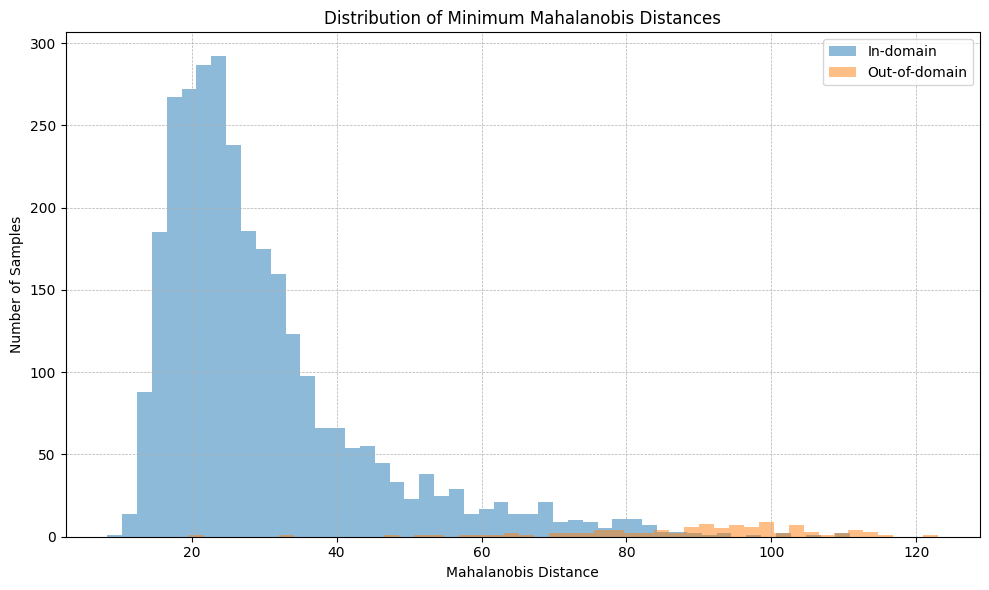

In [27]:
import matplotlib.pyplot as plt

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plot the histograms
plt.hist(val_scores, bins=50, alpha=0.5, label='In-domain')
plt.hist(oos_val_scores, bins=50, alpha=0.5, label='Out-of-domain')

# Add legend, title, and labels
plt.legend(loc='upper right')
plt.title('Distribution of Minimum Mahalanobis Distances')
plt.xlabel('Mahalanobis Distance')
plt.ylabel('Number of Samples')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()


In [32]:
num_smaller_50 = sum([value<50 for value in test_scores])

In [33]:
num_smaller_50

4044

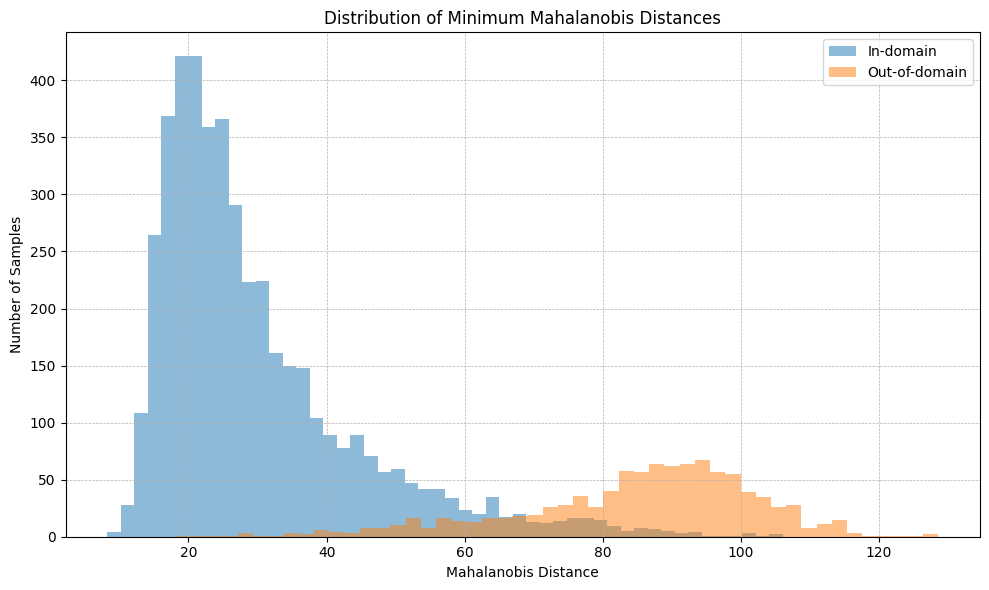

In [34]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plot the histograms
plt.hist(test_scores,bins=50, alpha=0.5, label='In-domain')
plt.hist(oos_test_scores, bins=50, alpha=0.5, label='Out-of-domain')

# Add legend, title, and labels
plt.legend(loc='upper right')
plt.title('Distribution of Minimum Mahalanobis Distances')
plt.xlabel('Mahalanobis Distance')
plt.ylabel('Number of Samples')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()


In [16]:
import optuna
from transformers import AutoTokenizer, AutoModel

# Assuming other necessary imports are already there

def objective(trial):
    # Optuna suggests hyperparameters
    seed_value=42
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)
    lr = trial.suggest_categorical('lr', [1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2])
    num_epochs = 25
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64, 128, 256])
    training_losses = []
    validation_losses = []
    train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
    # Model setup
    tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name)
    transformer_model = AutoModel.from_pretrained(pretrained_model_name)
    model = TextClassifier(transformer_model, len(unique_intents))
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    

    # Loss function and optimizer
    loss_function = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=lr)

    best_val_loss = float('inf')
    for epoch in range(num_epochs):
        # Training Phase
        model.train()  # Set the model to training mode
        total_train_loss = 0
        for batch in train_dataloader:
            input_ids, attention_mask, labels = batch['input_ids'].to(device), batch['attention_mask'].to(device), batch['labels'].to(device)
            optimizer.zero_grad()  # Zero the gradients
            predictions = model(input_ids, attention_mask)  # Forward pass
            loss = loss_function(predictions, labels) 
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights
    
            total_train_loss += loss.item()
        
        avg_train_loss = total_train_loss / len(train_dataloader)
        training_losses.append(avg_train_loss) 
    
        # Validation Phase
        model.eval()  # Set the model to evaluation mode
        total_val_loss = 0
        with torch.no_grad():  # Disable gradient calculations
            for batch in val_dataloader:
                input_ids, attention_mask, labels = batch['input_ids'].to(device), batch['attention_mask'].to(device), batch['labels'].to(device)
                predictions = model(input_ids, attention_mask) 
                loss = loss_function(predictions, labels)  # Compute loss
                total_val_loss += loss.item()
        avg_val_loss = total_val_loss / len(val_dataloader)
        validation_losses.append(avg_val_loss)
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            # Save the model
            torch.save(model, model_name)
            print(f"Epoch {epoch+1}/{num_epochs}: Lower validation loss found. Model saved.")
    return best_val_loss
    
    # trial.set_user_attr("training_losses", training_losses)
    # trial.set_user_attr("validation_losses", validation_losses)
    # model = torch.load(model_name)
    # model.eval()  # Put the model in evaluation mode
    # model = fine_model.to(device)
    # fine_transformer = model.transformer
    # train_embeddings = encode_sentences(fine_transformer, train_sentences)
    # val_embeddings = encode_sentences(fine_transformer, val_sentences)
    # oos_val_embeddings = encode_sentences(fine_transformer, oos_val_sentences)

    # intent_means = {}
    # for encoded_label in np.unique(encoded_train_labels):
    #     # Find indices where the encoded label matches
    #     indices = np.where(encoded_train_labels == encoded_label)[0]
        
    #     # Calculate the mean embedding for the current intent
    #     intent_embeddings = train_embeddings[indices]
    #     intent_mean = np.mean(intent_embeddings, axis=0)
        
    #     # Use the encoded label as the dictionary key
    #     intent_means[encoded_label] = intent_mean
    # covariance = np.cov(train_embeddings, rowvar=False)
    # cov_inverse = inv(covariance)
    # val_scores = [min_mahalanobis_for_sample(sample, intent_means, cov_inverse) for sample in val_embeddings]
    # oos_val_scores = [min_mahalanobis_for_sample(sample, intent_means, cov_inverse) for sample in oos_val_embeddings]

    # # True binary labels: 0 for in-domain and 1 for OOD
    # y_true = [0] * len(val_scores) + [1] * len(oos_val_scores)

    # # Combine the scores
    # y_scores = val_scores + oos_val_scores

    # # Compute AUPR
    # aupr = average_precision_score(y_true, y_scores)
    
    # return aupr

# Create a study object and optimize the objective function
study = optuna.create_study(direction='minimize',  study_name='ce_loss_CLINC150_min_val', storage='sqlite:///desperate.db', load_if_exists= True)
study.optimize(objective, n_trials=35)  # n_trials is the number of iterations

# Get the best parameters
best_params = study.best_params
print("Best parameters:", best_params)



[I 2024-02-14 13:04:29,832] Using an existing study with name 'ce_loss_CLINC150_min_val' instead of creating a new one.


Epoch 1/25: Lower validation loss found. Model saved.
Epoch 2/25: Lower validation loss found. Model saved.
Epoch 3/25: Lower validation loss found. Model saved.
Epoch 4/25: Lower validation loss found. Model saved.
Epoch 5/25: Lower validation loss found. Model saved.
Epoch 6/25: Lower validation loss found. Model saved.


[I 2024-02-14 13:10:46,877] Trial 21 finished with value: 5.029375974168169 and parameters: {'lr': 0.001, 'batch_size': 32}. Best is trial 15 with value: 0.16477927851906798.


Epoch 1/25: Lower validation loss found. Model saved.
Epoch 2/25: Lower validation loss found. Model saved.
Epoch 3/25: Lower validation loss found. Model saved.
Epoch 6/25: Lower validation loss found. Model saved.
Epoch 8/25: Lower validation loss found. Model saved.


[I 2024-02-14 13:15:30,543] Trial 22 finished with value: 0.172131660126863 and parameters: {'lr': 5e-05, 'batch_size': 64}. Best is trial 15 with value: 0.16477927851906798.


Epoch 1/25: Lower validation loss found. Model saved.
Epoch 2/25: Lower validation loss found. Model saved.
Epoch 3/25: Lower validation loss found. Model saved.
Epoch 4/25: Lower validation loss found. Model saved.
Epoch 5/25: Lower validation loss found. Model saved.
Epoch 6/25: Lower validation loss found. Model saved.
Epoch 8/25: Lower validation loss found. Model saved.


[I 2024-02-14 13:19:12,133] Trial 23 finished with value: 0.16501305469622216 and parameters: {'lr': 5e-05, 'batch_size': 256}. Best is trial 15 with value: 0.16477927851906798.


Epoch 1/25: Lower validation loss found. Model saved.
Epoch 2/25: Lower validation loss found. Model saved.
Epoch 3/25: Lower validation loss found. Model saved.
Epoch 4/25: Lower validation loss found. Model saved.
Epoch 5/25: Lower validation loss found. Model saved.
Epoch 6/25: Lower validation loss found. Model saved.
Epoch 8/25: Lower validation loss found. Model saved.


[I 2024-02-14 13:22:53,649] Trial 24 finished with value: 0.16501305469622216 and parameters: {'lr': 5e-05, 'batch_size': 256}. Best is trial 15 with value: 0.16477927851906798.


Epoch 1/25: Lower validation loss found. Model saved.
Epoch 2/25: Lower validation loss found. Model saved.
Epoch 3/25: Lower validation loss found. Model saved.
Epoch 4/25: Lower validation loss found. Model saved.
Epoch 5/25: Lower validation loss found. Model saved.
Epoch 6/25: Lower validation loss found. Model saved.
Epoch 8/25: Lower validation loss found. Model saved.


[I 2024-02-14 13:26:35,205] Trial 25 finished with value: 0.16501305469622216 and parameters: {'lr': 5e-05, 'batch_size': 256}. Best is trial 15 with value: 0.16477927851906798.


Epoch 1/25: Lower validation loss found. Model saved.
Epoch 2/25: Lower validation loss found. Model saved.
Epoch 3/25: Lower validation loss found. Model saved.
Epoch 5/25: Lower validation loss found. Model saved.


[I 2024-02-14 13:35:42,501] Trial 26 finished with value: 0.2109467755629126 and parameters: {'lr': 5e-05, 'batch_size': 16}. Best is trial 15 with value: 0.16477927851906798.


Epoch 1/25: Lower validation loss found. Model saved.
Epoch 2/25: Lower validation loss found. Model saved.
Epoch 3/25: Lower validation loss found. Model saved.
Epoch 6/25: Lower validation loss found. Model saved.


[I 2024-02-14 13:41:58,296] Trial 27 finished with value: 0.16477927851906798 and parameters: {'lr': 5e-05, 'batch_size': 32}. Best is trial 15 with value: 0.16477927851906798.


Epoch 1/25: Lower validation loss found. Model saved.
Epoch 2/25: Lower validation loss found. Model saved.
Epoch 3/25: Lower validation loss found. Model saved.
Epoch 6/25: Lower validation loss found. Model saved.


[I 2024-02-14 13:48:14,308] Trial 28 finished with value: 0.16477927851906798 and parameters: {'lr': 5e-05, 'batch_size': 32}. Best is trial 15 with value: 0.16477927851906798.


Epoch 1/25: Lower validation loss found. Model saved.
Epoch 2/25: Lower validation loss found. Model saved.
Epoch 3/25: Lower validation loss found. Model saved.
Epoch 4/25: Lower validation loss found. Model saved.
Epoch 5/25: Lower validation loss found. Model saved.
Epoch 21/25: Lower validation loss found. Model saved.


[I 2024-02-14 13:54:31,575] Trial 29 finished with value: 5.1851602488375725 and parameters: {'lr': 0.01, 'batch_size': 32}. Best is trial 15 with value: 0.16477927851906798.


Epoch 1/25: Lower validation loss found. Model saved.
Epoch 2/25: Lower validation loss found. Model saved.
Epoch 6/25: Lower validation loss found. Model saved.


[I 2024-02-14 14:00:47,016] Trial 30 finished with value: 0.20256850542686383 and parameters: {'lr': 0.0001, 'batch_size': 32}. Best is trial 15 with value: 0.16477927851906798.


Epoch 1/25: Lower validation loss found. Model saved.
Epoch 2/25: Lower validation loss found. Model saved.
Epoch 3/25: Lower validation loss found. Model saved.
Epoch 4/25: Lower validation loss found. Model saved.
Epoch 6/25: Lower validation loss found. Model saved.
Epoch 7/25: Lower validation loss found. Model saved.
Epoch 8/25: Lower validation loss found. Model saved.
Epoch 9/25: Lower validation loss found. Model saved.
Epoch 11/25: Lower validation loss found. Model saved.
Epoch 12/25: Lower validation loss found. Model saved.
Epoch 13/25: Lower validation loss found. Model saved.
Epoch 15/25: Lower validation loss found. Model saved.
Epoch 19/25: Lower validation loss found. Model saved.


[I 2024-02-14 14:07:07,485] Trial 31 finished with value: 5.0211423863755895 and parameters: {'lr': 0.0005, 'batch_size': 32}. Best is trial 15 with value: 0.16477927851906798.


Epoch 1/25: Lower validation loss found. Model saved.
Epoch 2/25: Lower validation loss found. Model saved.
Epoch 3/25: Lower validation loss found. Model saved.
Epoch 4/25: Lower validation loss found. Model saved.
Epoch 5/25: Lower validation loss found. Model saved.
Epoch 6/25: Lower validation loss found. Model saved.


[I 2024-02-14 14:13:29,508] Trial 32 finished with value: 5.029375974168169 and parameters: {'lr': 0.001, 'batch_size': 32}. Best is trial 15 with value: 0.16477927851906798.


Epoch 1/25: Lower validation loss found. Model saved.
Epoch 2/25: Lower validation loss found. Model saved.
Epoch 3/25: Lower validation loss found. Model saved.
Epoch 6/25: Lower validation loss found. Model saved.


[I 2024-02-14 14:19:50,487] Trial 33 finished with value: 0.16477927851906798 and parameters: {'lr': 5e-05, 'batch_size': 32}. Best is trial 15 with value: 0.16477927851906798.


Epoch 1/25: Lower validation loss found. Model saved.
Epoch 2/25: Lower validation loss found. Model saved.
Epoch 3/25: Lower validation loss found. Model saved.
Epoch 4/25: Lower validation loss found. Model saved.
Epoch 6/25: Lower validation loss found. Model saved.
Epoch 7/25: Lower validation loss found. Model saved.
Epoch 9/25: Lower validation loss found. Model saved.
Epoch 11/25: Lower validation loss found. Model saved.
Epoch 12/25: Lower validation loss found. Model saved.


[I 2024-02-14 14:26:14,019] Trial 34 finished with value: 5.057111598075704 and parameters: {'lr': 0.005, 'batch_size': 32}. Best is trial 15 with value: 0.16477927851906798.


Epoch 1/25: Lower validation loss found. Model saved.
Epoch 2/25: Lower validation loss found. Model saved.
Epoch 3/25: Lower validation loss found. Model saved.
Epoch 6/25: Lower validation loss found. Model saved.


[I 2024-02-14 14:32:35,043] Trial 35 finished with value: 0.16477927851906798 and parameters: {'lr': 5e-05, 'batch_size': 32}. Best is trial 15 with value: 0.16477927851906798.


Epoch 1/25: Lower validation loss found. Model saved.
Epoch 2/25: Lower validation loss found. Model saved.
Epoch 3/25: Lower validation loss found. Model saved.
Epoch 6/25: Lower validation loss found. Model saved.


[I 2024-02-14 14:38:56,183] Trial 36 finished with value: 0.16477927851906798 and parameters: {'lr': 5e-05, 'batch_size': 32}. Best is trial 15 with value: 0.16477927851906798.


Epoch 1/25: Lower validation loss found. Model saved.
Epoch 2/25: Lower validation loss found. Model saved.
Epoch 3/25: Lower validation loss found. Model saved.
Epoch 4/25: Lower validation loss found. Model saved.
Epoch 5/25: Lower validation loss found. Model saved.
Epoch 7/25: Lower validation loss found. Model saved.


[I 2024-02-14 14:42:58,300] Trial 37 finished with value: 0.16372895877187452 and parameters: {'lr': 5e-05, 'batch_size': 128}. Best is trial 37 with value: 0.16372895877187452.


Epoch 1/25: Lower validation loss found. Model saved.
Epoch 2/25: Lower validation loss found. Model saved.
Epoch 3/25: Lower validation loss found. Model saved.
Epoch 4/25: Lower validation loss found. Model saved.
Epoch 5/25: Lower validation loss found. Model saved.
Epoch 6/25: Lower validation loss found. Model saved.
Epoch 7/25: Lower validation loss found. Model saved.
Epoch 8/25: Lower validation loss found. Model saved.
Epoch 9/25: Lower validation loss found. Model saved.
Epoch 10/25: Lower validation loss found. Model saved.
Epoch 11/25: Lower validation loss found. Model saved.
Epoch 12/25: Lower validation loss found. Model saved.
Epoch 18/25: Lower validation loss found. Model saved.
Epoch 23/25: Lower validation loss found. Model saved.


[I 2024-02-14 14:47:03,319] Trial 38 finished with value: 5.076896627744039 and parameters: {'lr': 0.005, 'batch_size': 128}. Best is trial 37 with value: 0.16372895877187452.


Epoch 25/25: Lower validation loss found. Model saved.
Epoch 1/25: Lower validation loss found. Model saved.
Epoch 2/25: Lower validation loss found. Model saved.
Epoch 3/25: Lower validation loss found. Model saved.
Epoch 4/25: Lower validation loss found. Model saved.
Epoch 5/25: Lower validation loss found. Model saved.
Epoch 6/25: Lower validation loss found. Model saved.
Epoch 7/25: Lower validation loss found. Model saved.
Epoch 8/25: Lower validation loss found. Model saved.
Epoch 9/25: Lower validation loss found. Model saved.
Epoch 10/25: Lower validation loss found. Model saved.
Epoch 11/25: Lower validation loss found. Model saved.
Epoch 12/25: Lower validation loss found. Model saved.
Epoch 13/25: Lower validation loss found. Model saved.
Epoch 14/25: Lower validation loss found. Model saved.
Epoch 15/25: Lower validation loss found. Model saved.


[W 2024-02-14 14:49:45,147] Trial 39 failed with parameters: {'lr': 1e-05, 'batch_size': 128} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/ztybigcat/Desktop/my_own_ood/venv/lib/python3.11/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/tmp/ipykernel_4812/1372064853.py", line 45, in objective
    total_train_loss += loss.item()
                        ^^^^^^^^^^^
KeyboardInterrupt
[W 2024-02-14 14:49:45,147] Trial 39 failed with value None.


KeyboardInterrupt: 